In [15]:
import pandas as pd
import numpy as np
df = pd.read_csv('../raw_data/train.csv')

real_imgs = df[df.label == 0]
ai_imgs = df[df.label == 1]


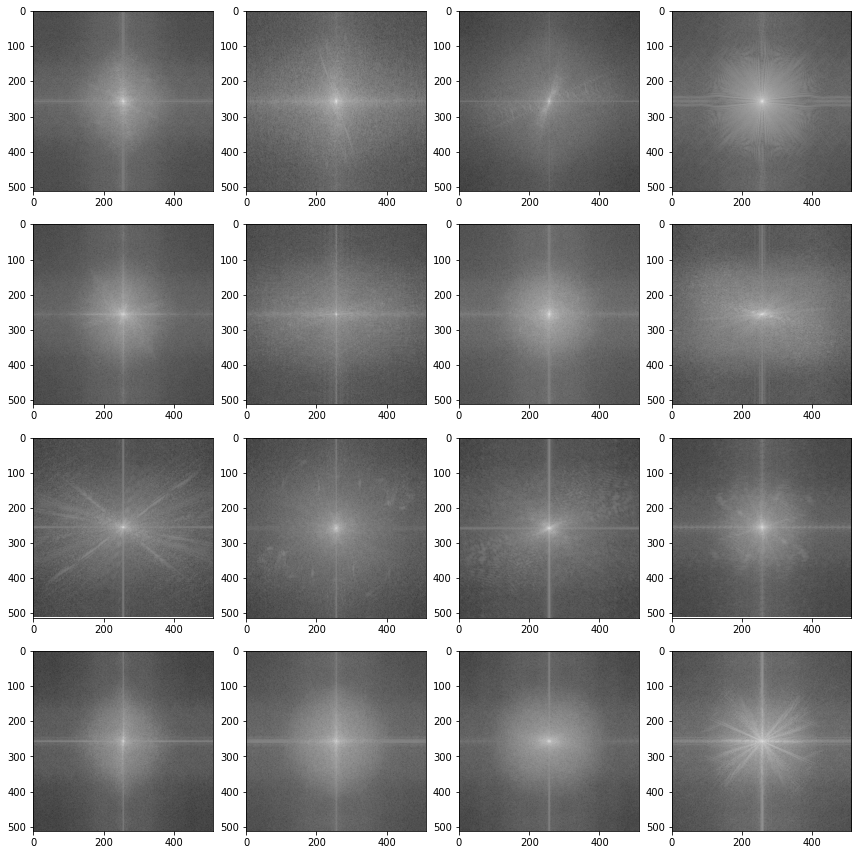

In [37]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for img_path, ax in zip(list(real_imgs['id'])[16:], axes.flat):
    img = Image.open(f'../raw_data/train/{img_path}')
    # image_grey = rgb2gray(img)
    image_channel =np.array(img)[:, :, 0]
    image_grey_fourier = np.fft.fftshift(np.fft.fft2(image_channel))
    log_img = np.log(abs(image_grey_fourier))
    ax.imshow(log_img, cmap='gray')

plt.tight_layout()
plt.savefig('../results/fft_real_imgs.png', facecolor='white')

In [43]:
log_img.shape[0] / 2

256.0

IndexError: index 5 is out of bounds for axis 0 with size 5

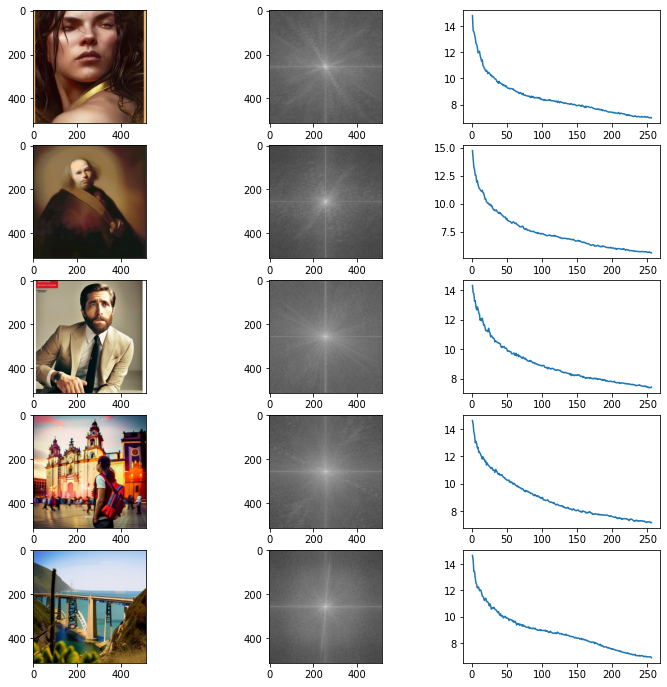

In [44]:
num_rows = 10
fig, axes = plt.subplots(num_rows, 3, figsize=(12, 12))

for idx, img_path in enumerate(list(ai_imgs['id'])[:num_rows]):
    img = Image.open(f'../raw_data/train/{img_path}')

    axes[idx, 0].imshow(img)
    # image_grey = rgb2gray(img)
    image_channel =np.array(img)[:, :, 0]
    image_grey_fourier = np.fft.fftshift(np.fft.fft2(image_channel))
    log_img = np.log(abs(image_grey_fourier))
    axes[idx, 1].imshow(log_img, cmap='gray')
    # create array of radii
    x,y = np.meshgrid(np.arange(log_img.shape[1]),np.arange(log_img.shape[0]))

    # R = np.sqrt(x**2+y**2) # if you want the origin at 0, 0

    x0, y0 = 256, 256

    R = np.sqrt((x-x0)**2+(y-y0)**2)

    # calculate the mean
    f = lambda r : log_img[(R >= r-.5) & (R < r+.5)].mean()
    r  = np.linspace(1,256,num=256)
    mean = np.vectorize(f)(r)

    axes[idx, 2].plot(r,mean)

plt.tight_layout()
plt.savefig('../results/fft_ai_imgs.png', facecolor='white')

In [35]:
log_img

array([[4.89034913, 5.49013414, 5.35396864, ..., 5.34382902, 5.35396864,
        5.49013414],
       [5.08206547, 5.75955682, 5.44421857, ..., 5.0242667 , 5.59309754,
        5.07366857],
       [4.8249132 , 4.19468474, 5.46328714, ..., 4.7178667 , 4.27989098,
        4.75281265],
       ...,
       [4.46018025, 5.32625105, 4.74156182, ..., 4.79209143, 5.76482287,
        5.43479361],
       [4.8249132 , 4.75281265, 4.27989098, ..., 4.27633785, 5.46328714,
        4.19468474],
       [5.08206547, 5.07366857, 5.59309754, ..., 5.4229525 , 5.44421857,
        5.75955682]])

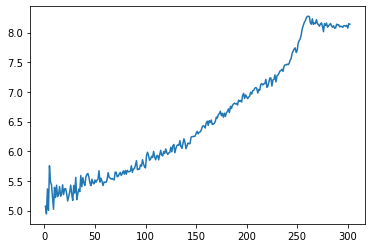

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# get some image
# image = data.coins()
# image = image[:,0:303]


plt.show()

In [ ]:
# to do
# compress fft output, radial or remove half if symmertrical
# how to classify?
# UMAP and visualise?
# autoencoder and visualise?
# make images/fft smaller


In [ ]:
def fourier_transform_rgb(image):
    f_size = 25
    transformed_channels = []
    for i in range(3):
        rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
        # rgb_fft[:225, 235:237] = 1
        # rgb_fft[-225:,235:237] = 1
        transformed_channels.append(abs(np.fft.ifft2(rgb_fft)))
    
    final_image = np.dstack([transformed_channels[0].astype(int), 
                             transformed_channels[1].astype(int), 
                             transformed_channels[2].astype(int)])
    
    fig, ax = plt.subplots(1, 2, figsize=(17,12))
    ax[0].imshow(image)
    ax[0].set_title('Original Image', fontsize = f_size)
    ax[0].set_axis_off()
    
    ax[1].imshow(final_image)
    ax[1].set_title('Transformed Image', fontsize = f_size)
    ax[1].set_axis_off()
    
    fig.tight_layout()

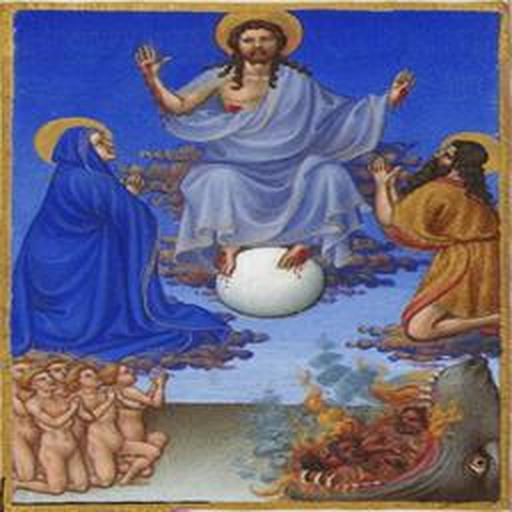

In [7]:
from PIL import Image
img = Image.open('../raw_data/train/0.jpg')
img
real_img = Image.open('../raw_data/train/3.jpg')
real_img

In [13]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

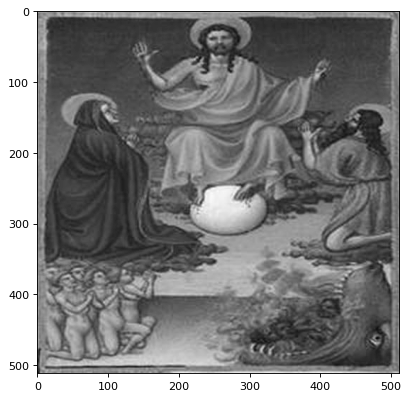

In [10]:
dark_image_grey = rgb2gray(real_img)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(dark_image_grey, cmap='gray')

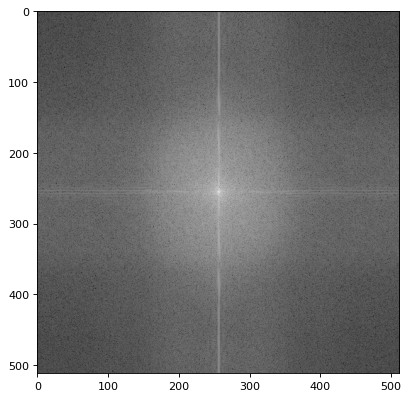

In [11]:
dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray');